<a href="https://colab.research.google.com/github/avakkyan/Itmo_phys/blob/main/%D0%94%D0%B8%D1%84%D1%80%D0%B0%D0%BA%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D1%88%D1%91%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Моделирование разрешающей способности дифракционной решетки с заданным
периодом и общим числом штрихов. Задача показать раздельными близкие спектральные
линии. Вывод цветного спектра и графика зависимости интенсивности от угловой
координаты (угла дифракции) (6 баллов)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Введём параметры дифракциоонной решётки и спектральных линий:


*   d - Период решётки
*   N - Количество штрихоов
*   wavelengths - длины волн, м
*   theta - диапазон углов, радианы





In [ ]:
d = 1e-6
N = 1000
wavelengths = [600e-9, 602e-9]
theta = np.linspace(-0.1, 0.1, 1000)

Формула дифракции на одиночном штрихе: интенсивность дифракцииинтенсивность дифракции
𝐼(𝜃) от одиночного штриха пропорциональна квадрату функции синуса:

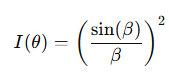

Где Тетта - угол дифракции, а бетта - изменение фазы волны на одном штрихе,

Формула дифракции на N штрихах: когда свет проходит через N штрихов, интенсивность дифракционной картины изменяется и описывается как:

 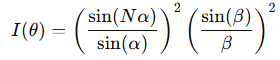

Где альфа - изменение фазы волны на всей решётке.

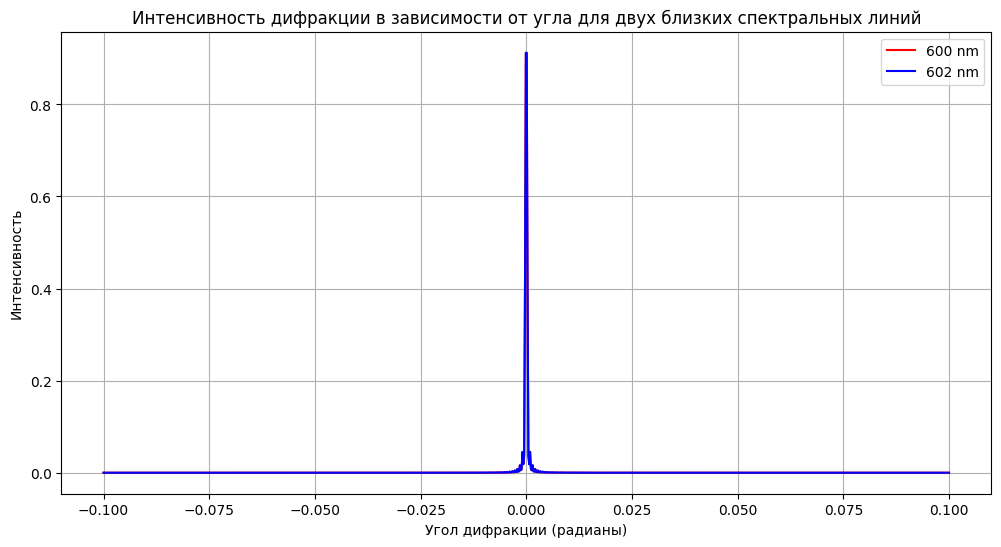

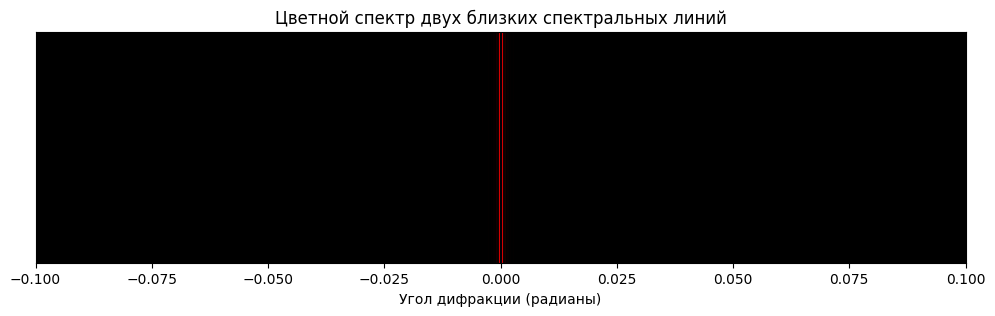

In [ ]:
# Функция для расчета интенсивности дифракции
def diffraction_intensity(theta, wavelength):
    beta = (np.pi * d / wavelength) * np.sin(theta)
    alpha = (np.pi / wavelength) * d * N * np.sin(theta)
    return (np.sin(beta) / beta)**2 * (np.sin(alpha) / alpha)**2

# Вычисление интенсивности для каждой длины волны
spectrum_intensity = np.zeros((100, 1000))
for i, wl in enumerate(wavelengths):
    intensity = diffraction_intensity(theta, wl)
    normalized_intensity = intensity / np.max(intensity)
    spectrum_intensity += np.outer(np.ones(100), normalized_intensity)

plt.figure(figsize=(12, 6))
colors = ['red', 'blue']
labels = ['600 nm', '602 nm']
for intensity, color, label in zip(intensities, colors, labels):
    plt.plot(theta, intensity, label=label, color=color)

plt.title('Интенсивность дифракции в зависимости от угла для двух близких спектральных линий')
plt.xlabel('Угол дифракции (радианы)')
plt.ylabel('Интенсивность')
plt.legend()
plt.grid(True)
plt.show()

# Создание цветовой карты
colors = ["black", "red", "blue", "black"]  # Цвета для спектральных линий
nodes = [0.0, 0.5 - 0.001, 0.5 + 0.001, 1.0]  # Позиции цветов
cmap = LinearSegmentedColormap.from_list("spectral_lines", list(zip(nodes, colors)))

# Визуализация спектра
plt.figure(figsize=(12, 3))
plt.imshow(spectrum_intensity, aspect='auto', cmap=cmap, extent=(theta[0], theta[-1], 0, 1))
plt.title('Цветной спектр двух близких спектральных линий')
plt.xlabel('Угол дифракции (радианы)')
plt.yticks([])
plt.grid(False)
plt.show()
